In [8]:
# Imports 
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib

%matplotlib inline

import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
from pathlib import Path


In [9]:
# Initialize the Panel Extensions (for Plotly)
pn.extension("plotly")

In [10]:
# Import hvplot.pandas after pn.extension
import hvplot.pandas

In [97]:
# Read in the first csv "profitable_portfolio"
profitable_portfolio_df = Path("resources/profitable_portfolio.csv")

# Adjust the df to display the required data
profitable_portfolio_df = pd.read_csv(profitable_portfolio_df, index_col="symbol")
profitable_portfolio_df = profitable_portfolio_df.drop(columns=["Unnamed: 0", "sector"])

# Rename Columns
#columns = ["Portfolio Profits"]
#profitable_portfolio_df = profitable_portfolio_df.columns = columns

# Display the new df
profitable_portfolio_df

,profit
symbol,
NOW,305179.95
AJG,265210.00
PNC,176340.00
TDY,172280.01
CBOE,151660.01
BKNG,142670.04
SPGI,123500.00
KMB,120020.01
KEYS,109759.99


In [71]:
# Read in the csv for the s&p500_profits 
sp500_profits_df = Path("resources/s&p500_profits.csv")

# Adjust the df to display the required data
sp500_profits_df = pd.read_csv(sp500_profits_df, index_col="symbol")
sp500_profits_df = sp500_profits_df.drop(columns=["Unnamed: 0", "sector"])
sp500_profits_df = sp500_profits_df.dropna()

# Display the new df
sp500_profits_df.head()

,profit
symbol,
MMM,-168420.0
AOS,0.0
ABT,-81980.0
ABBV,52350.0
ABMD,0.0


## Question 1 

#### Based on the moving averages of the S&P 500 stocks, what are the top ten companies returning the highest profit?

This section will contain the caclulations, analysis, and visualizations for the first research question

### Portfolio Returns

In [72]:
# Calculate daily returns for the profitable portfolio
portfolio_returns = profitable_portfolio_df.pct_change()
portfolio_returns


# Create a line plot using hvplot for portfolio returns
hvlineplot_portfolioreturns = portfolio_returns.hvplot(label="Proftiable Portfolio Returns",
                                                       legend=True,
                                                       color="crimson",
                                                       figsize=(15,10))

# Display the line plot for portfolio returns
hvlineplot_portfolioreturns


:Curve   [symbol]   (profit)

In [91]:
# S&P 500 daily returns
sp500_returns = sp500_profits_df.pct_change()
sp500_returns.head()

,profit
symbol,
MMM,NaN
AOS,-1.00000
ABT,-inf
ABBV,-1.63857
ABMD,-1.00000


In [92]:
# Combine the two df's
# Plotting wont work bc the two columns have the same name but for some reason it wont let me change it
combined_returns = pd.concat([portfolio_returns, sp500_returns], axis="columns", join="inner")
combined_returns.head()


,profit,profit
symbol,,
NOW,NaN,3.311669
AJG,-0.130972,inf
PNC,-0.335093,inf
TDY,-0.023024,6.957506
CBOE,-0.119689,32.553174


In [99]:
#hvlineplot = combined_returns.hvplot(label="Returns",
                                     #legend=True,
                                     #figsize=(15,10))

# Display the line plot for portfolio returns
#hvlineplot

### Portfolio Distribution

In [50]:
# Reset the index in the profitable_portfolio_df 
# This will allow you to plot the pie graph below
portfolio_distribution = profitable_portfolio_df.reset_index()
portfolio_distribution

,symbol,profit
0,NOW,305179.95
1,AJG,265210.00
2,PNC,176340.00
3,TDY,172280.01
4,CBOE,151660.01
5,BKNG,142670.04
6,SPGI,123500.00
7,KMB,120020.01
8,KEYS,109759.99
9,AMAT,109400.00


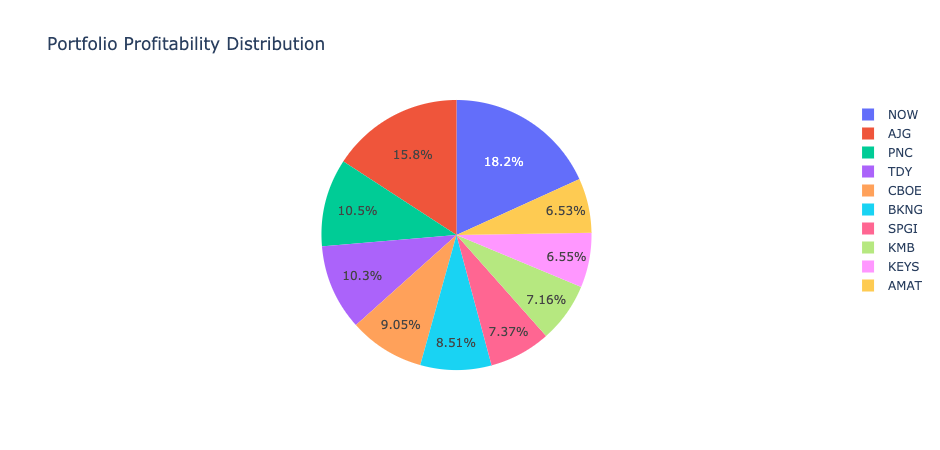

In [49]:
# Use the proftiable_portfolio_df dataset to create a proftiability distribution 

# Create a pie graph using the plotly express function 
profitability_piechart = px.pie(portfolio_distribution,
                                values="profit",
                                names="symbol",
                                title="Portfolio Profitability Distribution")
                                
# Display the pie chart
profitability_piechart.show()


### Profitability Outliers

In [58]:
# Reset the index in the profitable_portfolio_df 
# This will allow you to plot the pie graph below
sp500_outliers = sp500_profits_df.reset_index()
sp500_outliers.head()

,symbol,profit
0,MMM,-168420.0
1,AOS,0.0
2,ABT,-81980.0
3,ABBV,52350.0
4,ABMD,0.0


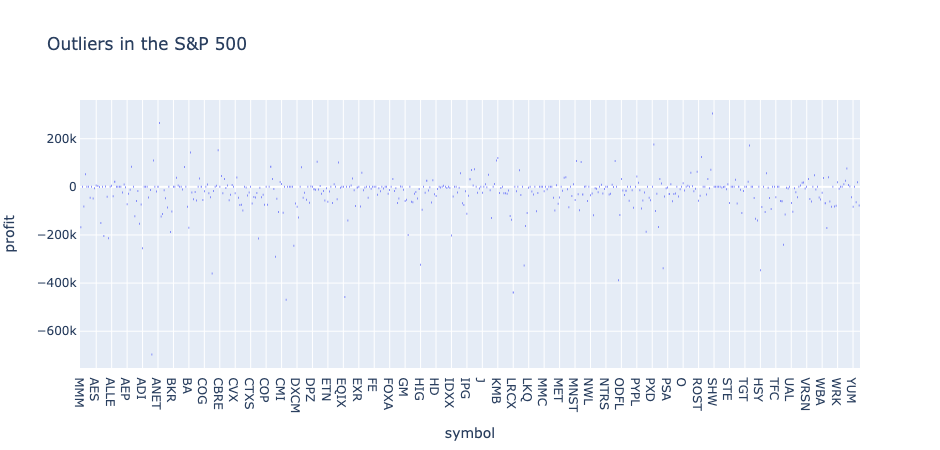

In [64]:
sp500_outliers = px.box(sp500_outliers,
                        x="symbol",
                        y="profit",
                        title="Outliers in the S&P 500")

sp500_outliers

In [62]:
# Using the sp500_profits_df, determine the profitability outliers
profitability_outliers = sp500_outliers.nlargest(10, 'profit')
profitability_outliers

,symbol,profit
409,NOW,305179.95
51,AJG,265210.00
371,PNC,176340.00
433,TDY,172280.01
89,CBOE,151660.01
71,BKNG,142670.04
402,SPGI,123500.00
270,KMB,120020.01
269,KEYS,109759.99
47,AMAT,109400.00


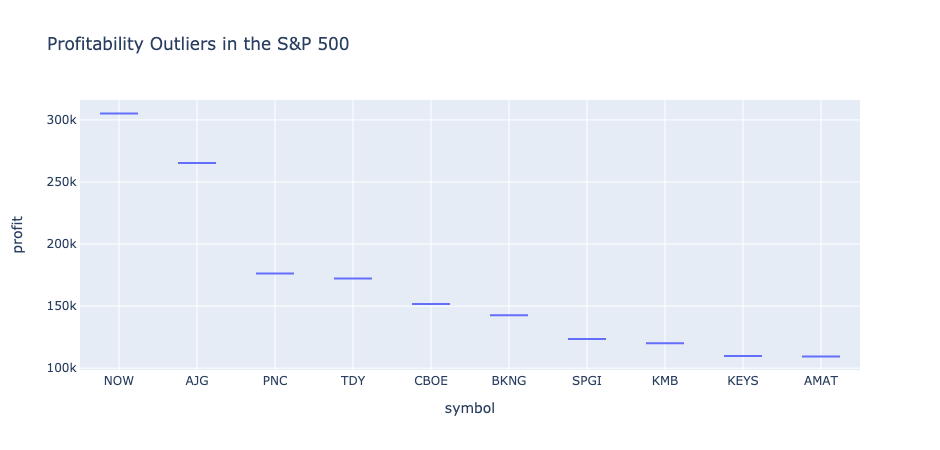

In [63]:
profitability_outliers = px.box(profitability_outliers,
                                x="symbol",
                                y="profit",
                                title="Profitability Outliers in the S&P 500")

profitability_outliers